In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import cholesky
from tqdm import tqdm
from max_k_cut_fj import solve_sdp_program
from max_k_cut_n import find_partition_1, find_partition_2
from utils import load_gset_graph, generate_random_graph

In [2]:
k = 4
iters = 10000
# p = './benchmark/max_k_cut/G14'
# W = load_gset_graph(p)
n = 100
W = generate_random_graph(n)

In [3]:
RELAX = solve_sdp_program(W, k)

In [4]:
A = cholesky(RELAX)

In [5]:
sums_1 = list()
for _ in tqdm(range(iters)):
    s = find_partition_1(A, W, k)
    sums_1.append(s)

100%|██████████| 10000/10000 [01:44<00:00, 96.08it/s]


In [6]:
max(sums_1)

1932.0

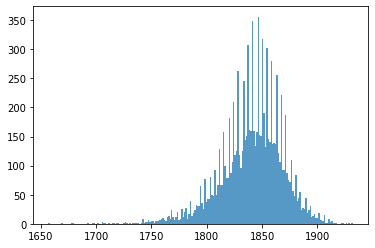

In [7]:
plt.hist(sums_1, len(list(set(sums_1))), alpha=0.75)
plt.show()

In [8]:
sums_2 = list()
for _ in tqdm(range(iters)):
    s = find_partition_2(A, W, k)
    sums_2.append(s)

100%|██████████| 10000/10000 [02:39<00:00, 62.52it/s]


In [9]:
max(sums_2)

1905.0

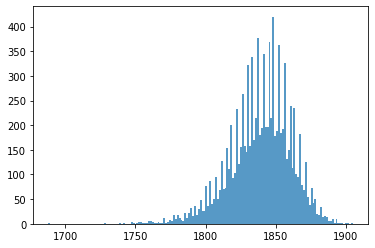

In [10]:
plt.hist(sums_2, len(list(set(sums_2))), alpha=0.75)
plt.show()